In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='arial')

In [23]:
##### Input file name
fn_fp_list = ['fp', 'fn']
rup_ind_list = [0, 0, 0, 0]
source_ind_list = [83, 108, 606, 626]
fileName = ['sim_s5_'+i+'_ucerf3_'+str(rup_ind_list[j])+'_'+str(source_ind_list[j])+'.xlsx' for j in range(len(source_ind_list)) for i in fn_fp_list]
filePath = [os.getcwd()+'\\output\\'+i for i in fileName]
file_dict = {i+2*j: {'source': source_ind_list[j],
                     'orient': fn_fp_list[i]}
                     for j in range(len(source_ind_list)) for i in range(len(fn_fp_list))}
saveDir = os.getcwd()+'\\output\\TeamMeeting_031620\\'

In [13]:
fileName

['sim_s5_fp_ucerf3_0_83.xlsx',
 'sim_s5_fn_ucerf3_0_83.xlsx',
 'sim_s5_fp_ucerf3_0_108.xlsx',
 'sim_s5_fn_ucerf3_0_108.xlsx',
 'sim_s5_fp_ucerf3_0_606.xlsx',
 'sim_s5_fn_ucerf3_0_606.xlsx',
 'sim_s5_fp_ucerf3_0_626.xlsx',
 'sim_s5_fn_ucerf3_0_626.xlsx']

In [14]:
filePath

['C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fp_ucerf3_0_83.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fn_ucerf3_0_83.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fp_ucerf3_0_108.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fn_ucerf3_0_108.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fp_ucerf3_0_606.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fn_ucerf3_0_606.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fp_ucerf3_0_626.xlsx',
 'C:\\Users\\Barry\\OneDrive - SlateGeotech\\Fragility\\output\\sim_s5_fn_ucerf3_0_626.xlsx']

In [15]:
sheetName1 = 'pdm'
sheetName2 = 'pdm_g_pgv'
sheetName3 = 'pdm_g_pga'

In [16]:
dfOut = {}
for i in range(len(fileName)):
    df = pd.read_excel(filePath[i], sheet_name=sheetName1)
    dfOut.update({'df'+str(i):{'file':fileName[i],
                               'data':df}})
#     val = np.transpose(df.values)
#     x = val[0]*1.60934
#     if i == 0:
#         valSum = val[13:len(headers)]
#     else:
#         valSum = np.add(valSum,val[13:len(headers)])
columns = dfOut['df0']['data'].columns

In [17]:
columns

Index(['rr (repairs/km)', 'site_1: p_leak', 'site_1: p_break',
       'site_2: p_leak', 'site_2: p_break', 'site_3: p_leak',
       'site_3: p_break', 'site_4: p_leak', 'site_4: p_break',
       'site_5: p_leak', 'site_5: p_break', 'p_leak_avg', 'p_break_avg',
       'site_1: rate_leak', 'site_1: rate_break', 'site_2: rate_leak',
       'site_2: rate_break', 'site_3: rate_leak', 'site_3: rate_break',
       'site_4: rate_leak', 'site_4: rate_break', 'site_5: rate_leak',
       'site_5: rate_break', 'rate_leak_avg', 'rate_break_avg'],
      dtype='object')

In [18]:
file_dict

{0: {'source': 83, 'orient': 'fp'},
 1: {'source': 83, 'orient': 'fn'},
 2: {'source': 108, 'orient': 'fp'},
 3: {'source': 108, 'orient': 'fn'},
 4: {'source': 606, 'orient': 'fp'},
 5: {'source': 606, 'orient': 'fn'},
 6: {'source': 626, 'orient': 'fp'},
 7: {'source': 626, 'orient': 'fn'}}

In [19]:
prob_leak_scen = []
prob_break_scen = []
# prob_leak_avg_scen = []
# prob_break_avg_scen = []

rr = dfOut['df0']['data'][columns[0]]*1.60934
for j in range(len(fileName)):
    prob_leak_scen.append([dfOut['df'+str(j)]['data'][columns[1+2*i]] for i in range(5)])
    prob_break_scen.append([dfOut['df'+str(j)]['data'][columns[2+2*i]] for i in range(5)])
#     prob_leak_avg_scen.append(dfOut['df'+str(j)]['data'][columns[23]])
#     prob_break_avg_scen.append(dfOut['df'+str(j)]['data'][columns[24]])

prob_leak_scen = np.asarray(prob_leak_scen)
prob_break_scen = np.asarray(prob_break_scen)
# prob_leak_avg_scen = np.asarray(rate_leak_avg_scen)
# prob_break_avg_scen = np.asarray(rate_break_avg_scen)

606
fp


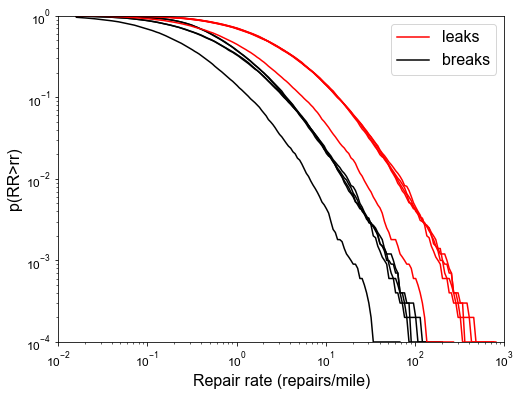

In [42]:
ind = [4]
rup_ind = str(file_dict[ind[0]]['source'])
fn_fp = file_dict[ind[0]]['orient']
print(rup_ind)
print(fn_fp)

nx = 1
ny = 1
figsize = (8,6)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
xlabel = 'Repair rate (repairs/mile)'
# ylabel = '$\sum(\lambda(RR>rr) = p(RR>rr)*rate)$'
ylabel = r'p(RR>rr)'
lgstr = ['leaks','breaks']
case = 3

for j in ind:
    if case == 1:
        ## plot leaks breaks for site 1 (empty)
        ax.loglog(rr,prob_leak_scen[j][0],'None')
        ax.loglog(rr,prob_break_scen[j][0],'None')
    elif case == 2:
        ## plot leaks breaks for site 1
        ax.loglog(rr,prob_leak_scen[j][0],'-r')
        ax.loglog(rr,prob_break_scen[j][0],'-k')
    elif case == 3:
        ## plot leaks breaks for all sites
        for i in range(5):
            ax.loglog(rr,prob_leak_scen[j][i],'-r')
            ax.loglog(rr,prob_break_scen[j][i],'-k')
#     elif case == 4:
        ## plot leaks breaks for all sites (transparent)
#         for i in range(5):
#             ax.loglog(rr,rate_leak_scen[j][i],'-r',alpha=0.25)
#             ax.loglog(rr,rate_break_scen[j][i],'-k',alpha=0.25)
#         ax.loglog(rr,rate_leak_avg_scen[j],'-r',linewidth=2.5)
#         ax.loglog(rr,rate_break_avg_scen[j],'-k',linewidth=2.5)

## figure format
if case == 2 or case == 3:
    plt.legend(lgstr,fontsize=fontsize_label)
ax.set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
ax.set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
ax.set_xlim([0.01,1000])
# ax.set_ylim([10**-12,10**-7.5])
ax.set_ylim([10**-4,10**0])
ax.tick_params(labelsize=fontsize_axis)
if case == 1:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_prob_empty.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_prob_site_1.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 3:
    plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_prob_site_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# elif case == 4:
#     plt.savefig(saveDir+'0_' + rup_ind + '_' + fn_fp + '_rates_site_all_avg.png',dpi=100,format='png',quality=100,bbox_inches='tight')

##
plt.show()

In [12]:
fn_fp

'fp'

In [13]:
file_dict

{0: {'source': 83, 'orient': 'fp'},
 1: {'source': 83, 'orient': 'fn'},
 2: {'source': 108, 'orient': 'fp'},
 3: {'source': 108, 'orient': 'fn'},
 4: {'source': 606, 'orient': 'fp'},
 5: {'source': 606, 'orient': 'fn'},
 6: {'source': 626, 'orient': 'fp'},
 7: {'source': 626, 'orient': 'fn'}}

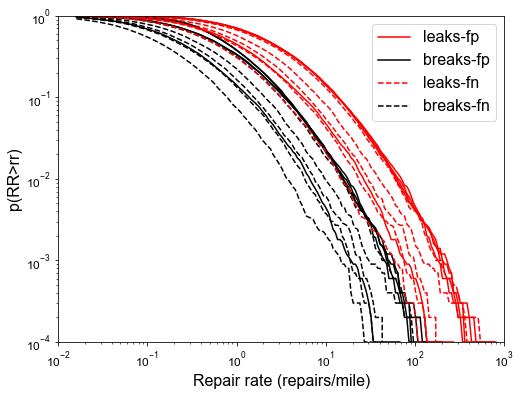

In [39]:
ind = [4,5]

nx = 1
ny = 1
figsize = (8,6)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
xlabel = 'Repair rate (repairs/mile)'
# ylabel = '$\sum(\lambda(RR>rr) = p(RR>rr)*rate)$'
ylabel = r'p(RR>rr)'
lgstr = ['leaks-fp','breaks-fp','leaks-fn','breaks-fn']
linestyle = ['-','--']
alpha = [0.25,1]
case = 2

if case == 1:
    for j in range(len(ind)):
        ## plot leaks breaks for all sites (transparent)
        ax.loglog(rr,prob_leak_scen[ind[j]][0],'r',linestyle=linestyle[np.mod(j,2)])
        ax.loglog(rr,prob_break_scen[ind[j]][0],'k',linestyle=linestyle[np.mod(j,2)])
elif case == 2:
    for i in range(5):
        for j in range(len(ind)):
            ## plot leaks breaks for all sites (transparent)
            ax.loglog(rr,prob_leak_scen[ind[j]][i],'r',linestyle=linestyle[np.mod(j,2)])
            ax.loglog(rr,prob_break_scen[ind[j]][i],'k',linestyle=linestyle[np.mod(j,2)])
# elif case == 3:
#     for i in range(5):
#         for j in range(len(ind)):
#             ## plot leaks breaks for all sites (transparent)
#             ax.loglog(rr,rate_leak_scen[ind[j]][i],'r',linestyle=linestyle[np.mod(j,2)],alpha=0.25)
#             ax.loglog(rr,rate_break_scen[ind[j]][i],'k',linestyle=linestyle[np.mod(j,2)],alpha=0.25)
#     for j in range(len(ind)):
#         ax.loglog(rr,rate_leak_avg_scen[ind[j]],'r',linestyle=linestyle[np.mod(j,2)],linewidth=2.5)
#         ax.loglog(rr,rate_break_avg_scen[ind[j]],'k',linestyle=linestyle[np.mod(j,2)],linewidth=2.5)

## figure format
# if case == 2 or case == 3:
plt.legend(lgstr,fontsize=fontsize_label)
ax.set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
ax.set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
ax.set_xlim([0.01,1000])
# ax.set_ylim([10**-12,10**-7.5])
ax.set_ylim([10**-4,10**-0])
ax.tick_params(labelsize=fontsize_axis)
if case == 1:
    plt.savefig(saveDir+'0_' + rup_ind + '_fn_fp_prob_site_1.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'0_' + rup_ind + '_fn_fp_prob_site_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# elif case == 3:
#     plt.savefig(saveDir+'0_' + rup_ind + '_fn_fp_rates_site_all_avg.png',dpi=100,format='png',quality=100,bbox_inches='tight')

##
plt.show()

In [45]:
ind

range(0, 8)

In [42]:
file_dict

{0: {'source': 83, 'orient': 'fp'},
 1: {'source': 83, 'orient': 'fn'},
 2: {'source': 108, 'orient': 'fp'},
 3: {'source': 108, 'orient': 'fn'},
 4: {'source': 606, 'orient': 'fp'},
 5: {'source': 606, 'orient': 'fn'},
 6: {'source': 626, 'orient': 'fp'},
 7: {'source': 626, 'orient': 'fn'}}

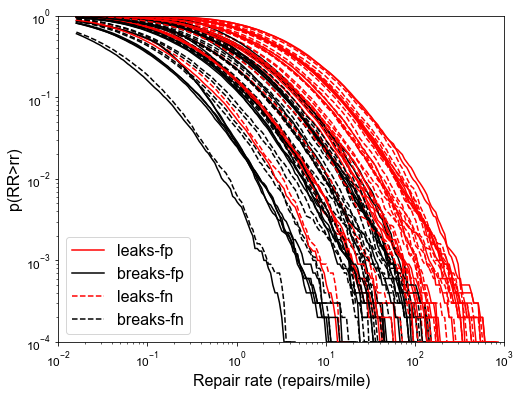

In [44]:
ind = range(8)
# rate_leak_avg_all_fp = (rate_leak_avg_scen[0] + rate_leak_avg_scen[2] + rate_leak_avg_scen[4] + rate_leak_avg_scen[6])
# rate_leak_avg_all_fn = (rate_leak_avg_scen[1] + rate_leak_avg_scen[3] + rate_leak_avg_scen[5] + rate_leak_avg_scen[7])
# rate_break_avg_all_fp = (rate_break_avg_scen[0] + rate_break_avg_scen[2] + rate_break_avg_scen[4] + rate_break_avg_scen[6])
# rate_break_avg_all_fn = (rate_break_avg_scen[1] + rate_break_avg_scen[3] + rate_break_avg_scen[5] + rate_break_avg_scen[7])

nx = 1
ny = 1
figsize = (8,6)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
xlabel = 'Repair rate (repairs/mile)'
# ylabel = '$\sum(\lambda(RR>rr) = p(RR>rr)*rate)$'
ylabel = r'p(RR>rr)'
lgstr = ['leaks-fp','breaks-fp','leaks-fn','breaks-fn']
linestyle = ['-','--']
alpha = [0.25,1]
case = 2

if case == 1:
    for j in range(len(ind)):
        ## plot leaks breaks for all sites (transparent)
        ax.loglog(rr,prob_leak_scen[ind[j]][0],'r',linestyle=linestyle[np.mod(j,2)])
        ax.loglog(rr,prob_break_scen[ind[j]][0],'k',linestyle=linestyle[np.mod(j,2)])
elif case == 2:
    for i in range(5):
        for j in range(len(ind)):
            ## plot leaks breaks for all sites (transparent)
            ax.loglog(rr,prob_leak_scen[ind[j]][i],'r',linestyle=linestyle[np.mod(j,2)])
            ax.loglog(rr,prob_break_scen[ind[j]][i],'k',linestyle=linestyle[np.mod(j,2)])
# elif case == 3:
#     for i in range(5):
#         for j in range(len(ind)):
#             ## plot leaks breaks for all sites (transparent)
#             ax.loglog(rr,prob_leak_scen[ind[j]][i],'r',linestyle=linestyle[np.mod(j,2)],alpha=0.25)
#             ax.loglog(rr,prob_break_scen[ind[j]][i],'k',linestyle=linestyle[np.mod(j,2)],alpha=0.25)
#     for j in range(len(ind)):
#         ax.loglog(rr,rate_leak_avg_scen[ind[j]],'r',linestyle=linestyle[np.mod(j,2)],linewidth=2.5)
#         ax.loglog(rr,rate_break_avg_scen[ind[j]],'k',linestyle=linestyle[np.mod(j,2)],linewidth=2.5)
# elif case == 4:
# #     for i in range(5):
# #         for j in range(len(ind)):
# #             ## plot leaks breaks for all sites (transparent)
# #             ax.loglog(rr,rate_leak_scen[ind[j]][i],'r',linestyle=linestyle[np.mod(j,2)],alpha=0.10)
# #             ax.loglog(rr,rate_break_scen[ind[j]][i],'k',linestyle=linestyle[np.mod(j,2)],alpha=0.10)
            
#     for j in range(len(ind)):
#         ax.loglog(rr,rate_leak_avg_scen[ind[j]],'r',linestyle=linestyle[np.mod(j,2)],linewidth=2.5,alpha=0.25)
#         ax.loglog(rr,rate_break_avg_scen[ind[j]],'k',linestyle=linestyle[np.mod(j,2)],linewidth=2.5,alpha=0.25)
#     ax.loglog(rr,rate_leak_avg_all_fp,'-r',linewidth=3)
#     ax.loglog(rr,rate_leak_avg_all_fn,'--r',linewidth=3)
#     ax.loglog(rr,rate_break_avg_all_fp,'-k',linewidth=3)
#     ax.loglog(rr,rate_break_avg_all_fn,'--k',linewidth=3)

## figure format
# if case == 2 or case == 3:
plt.legend(lgstr,fontsize=fontsize_label)
ax.set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
ax.set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
ax.set_xlim([0.01,1000])
# ax.set_ylim([10**-12,10**-7])
ax.set_ylim([10**-4,10**-0])
ax.tick_params(labelsize=fontsize_axis)
if case == 1:
    plt.savefig(saveDir+'all_fn_fp_prob_site_1.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'all_fn_fp_prob_site_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# elif case == 3:
#     plt.savefig(saveDir+'all_fn_fp_rates_site_all_avg.png',dpi=100,format='png',quality=100,bbox_inches='tight')
# elif case == 4:
#     plt.savefig(saveDir+'all_fn_fp_rates_site_all_avg_avg.png',dpi=100,format='png',quality=100,bbox_inches='tight')

##
plt.show()

In [126]:
dfOut2 = {}
for i in range(len(fileName)):
    df = pd.read_excel(filePath[i], sheet_name=sheetName2)
    dfOut2.update({'df'+str(i):{'file':fileName[i],
                                'data':df
columns2 = dfOut2['df0']['data'].columns

In [149]:
p_g_pgv_leak_scen = []
p_g_pgv_break_scen = []

pga = dfOut2['df0']['data'][columns2[0]]
for j in range(len(fileName)):
    p_g_pgv_leak_scen.append([dfOut2['df'+str(j)]['data'][columns2[1+2*i]] for i in range(5)])
    p_g_pgv_break_scen.append([dfOut2['df'+str(j)]['data'][columns2[2+2*i]] for i in range(5)])

p_g_pgv_leak_scen = np.asarray(p_g_pgv_leak_scen)
p_g_pgv_break_scen = np.asarray(p_g_pgv_break_scen)

In [150]:
columns2

Index(['pga (g)', 'site_1: p_leak_g_pgv', 'site_1: p_break_g_pgv',
       'site_2: p_leak_g_pgv', 'site_2: p_break_g_pgv', 'site_3: p_leak_g_pgv',
       'site_3: p_break_g_pgv', 'site_4: p_leak_g_pgv',
       'site_4: p_break_g_pgv', 'site_5: p_leak_g_pgv',
       'site_5: p_break_g_pgv', 'site_1: rate_leak_g_pgv',
       'site_1: rate_break_g_pgv', 'site_2: rate_leak_g_pgv',
       'site_2: rate_break_g_pgv', 'site_3: rate_leak_g_pgv',
       'site_3: rate_break_g_pgv', 'site_4: rate_leak_g_pgv',
       'site_4: rate_break_g_pgv', 'site_5: rate_leak_g_pgv',
       'site_5: rate_break_g_pgv'],
      dtype='object')

In [151]:
file_dict

{0: {'source': 83, 'orient': 'fp'},
 1: {'source': 83, 'orient': 'fn'},
 2: {'source': 108, 'orient': 'fp'},
 3: {'source': 108, 'orient': 'fn'},
 4: {'source': 606, 'orient': 'fp'},
 5: {'source': 606, 'orient': 'fn'},
 6: {'source': 626, 'orient': 'fp'},
 7: {'source': 626, 'orient': 'fn'}}

606
fp


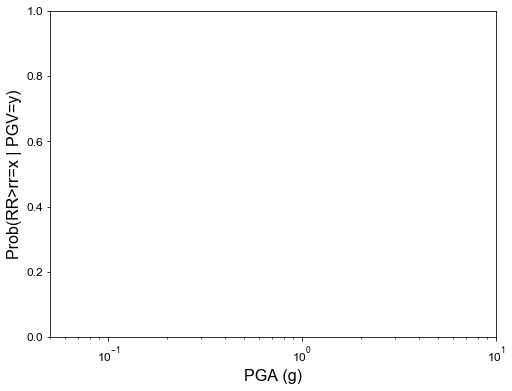

In [195]:
ind = [4]
rup_ind = str(file_dict[ind[0]]['source'])
fn_fp = file_dict[ind[0]]['orient']
print(rup_ind)
print(fn_fp)

nx = 1
ny = 1
figsize = (8,6)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
xlabel = 'PGA (g)'
# ylabel = '$\sum(\lambda(RR>rr) = p(RR>rr)*rate)$'
ylabel = 'Prob(RR>rr=x | PGV=y)'
lgstr = ['leaks','breaks']
lgtitle = 'rr = 0.5 repairs/mile\npgv = 100 cm/s'
case = 1
linestyle = ['-','--']

if case == 1:
    ## plot leaks breaks for site 1 (empty)
    ax.semilogx(pga,p_g_pgv_leak_scen[ind[0]][0],'None')
    ax.semilogx(pga,p_g_pgv_break_scen[ind[0]][0],'None')
elif case == 2:
    ## plot leaks breaks for site 1
    ax.semilogx(pga,p_g_pgv_leak_scen[ind[0]][0],'-r')
    ax.semilogx(pga,p_g_pgv_break_scen[ind[0]][0],'-k')
elif case == 3:
    ## plot leaks breaks for all sites
    for i in range(5):
        ax.semilogx(pga,p_g_pgv_leak_scen[ind[0]][i],'-r')
        ax.semilogx(pga,p_g_pgv_break_scen[ind[0]][i],'-k')
elif case == 4:
    for j in range(len(file_dict)):
        ## plot leaks breaks for all sites (transparent)
        for i in range(5):
            ax.semilogx(pga,p_g_pgv_leak_scen[j][i],'r',linestyle=linestyle[np.mod(j,2)])
            ax.semilogx(pga,p_g_pgv_break_scen[j][i],'k',linestyle=linestyle[np.mod(j,2)])

## figure format
if case > 1:
    plt.legend(lgstr,fontsize=fontsize_label,title=lgtitle,title_fontsize=fontsize_label,loc=4)
ax.set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
ax.set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
ax.set_xlim([0.05,10])
ax.set_ylim([0,1])
ax.tick_params(labelsize=fontsize_axis)
if case == 1:
    plt.savefig(saveDir+'all_p_g_pgv_empty.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'all_p_g_pgv_site_1.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 3:
    plt.savefig(saveDir+'all_p_g_pgv_site_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 4:
    plt.savefig(saveDir+'all_p_g_pgv_site_all_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')

##
plt.show()

In [168]:
dfOut3 = {}
for i in range(len(fileName)):
    df = pd.read_excel(filePath[i], sheet_name=sheetName3)
    dfOut3.update({'df'+str(i):{'file':fileName[i],
                                'data':df}})
columns3 = dfOut3['df0']['data'].columns

In [169]:
p_g_pga_leak_scen = []
p_g_pga_break_scen = []

pgv = dfOut3['df0']['data'][columns3[0]]
for j in range(len(fileName)):
    p_g_pga_leak_scen.append([dfOut3['df'+str(j)]['data'][columns3[1+2*i]] for i in range(5)])
    p_g_pga_break_scen.append([dfOut3['df'+str(j)]['data'][columns3[2+2*i]] for i in range(5)])

p_g_pga_leak_scen = np.asarray(p_g_pga_leak_scen)
p_g_pga_break_scen = np.asarray(p_g_pga_break_scen)

In [182]:
[print(columns3[1+2*i]) for i in range(5)]
[print(columns3[2+2*i]) for i in range(5)]

site_1: p_leak_g_pga
site_2: p_leak_g_pga
site_3: p_leak_g_pga
site_4: p_leak_g_pga
site_5: p_leak_g_pga
site_1: p_break_g_pga
site_2: p_break_g_pga
site_3: p_break_g_pga
site_4: p_break_g_pga
site_5: p_break_g_pga


[None, None, None, None, None]

606
fp


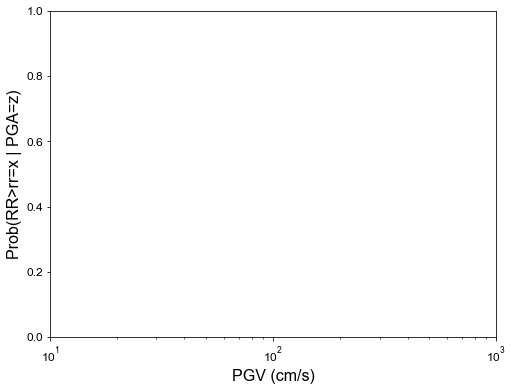

In [194]:
ind = [4]
rup_ind = str(file_dict[ind[0]]['source'])
fn_fp = file_dict[ind[0]]['orient']
print(rup_ind)
print(fn_fp)

nx = 1
ny = 1
figsize = (8,6)
fig, ax = plt.subplots(nx, ny, figsize=figsize)
fontsize_label = 16
fontsize_axis = 12
fontname = 'arial'
xlabel = 'PGV (cm/s)'
# ylabel = '$\sum(\lambda(RR>rr) = p(RR>rr)*rate)$'
ylabel = 'Prob(RR>rr=x | PGA=z)'
lgstr = ['leaks','breaks']
lgtitle = 'rr = 0.5 repairs/mile\npga = 0.5 g'
case = 1

if case == 1:
    ## plot leaks breaks for site 1 (empty)
    ax.semilogx(pgv,p_g_pga_leak_scen[ind[0]][0],'None')
    ax.semilogx(pgv,p_g_pga_break_scen[ind[0]][0],'None')
elif case == 2:
    ## plot leaks breaks for site 1
    ax.semilogx(pgv,p_g_pga_leak_scen[ind[0]][0],'-r')
    ax.semilogx(pgv,p_g_pga_break_scen[ind[0]][0],'-k')
elif case == 3:
    ## plot leaks breaks for all sites
    for i in range(5):
        ax.semilogx(pgv,p_g_pga_leak_scen[ind[0]][i],'-r')
        ax.semilogx(pgv,p_g_pga_break_scen[ind[0]][i],'-k')
elif case == 4:
    for j in range(len(file_dict)):
        ## plot leaks breaks for all sites (transparent)
        for i in range(5):
            ax.semilogx(pgv,p_g_pga_leak_scen[j][i],'r',linestyle=linestyle[np.mod(j,2)])
            ax.semilogx(pgv,p_g_pga_break_scen[j][i],'k',linestyle=linestyle[np.mod(j,2)])

## figure format
if case > 1:
    plt.legend(lgstr,fontsize=fontsize_label,title=lgtitle,title_fontsize=fontsize_label,loc=4)
ax.set_xlabel(xlabel,fontsize=fontsize_label,fontname=fontname)
ax.set_ylabel(ylabel,fontsize=fontsize_label,fontname=fontname)
ax.set_xlim([10,1000])
ax.set_ylim([0,1])
ax.tick_params(labelsize=fontsize_axis)
if case == 1:
    plt.savefig(saveDir+'all_p_g_pga_empty.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 2:
    plt.savefig(saveDir+'all_p_g_pga_site_1.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 3:
    plt.savefig(saveDir+'all_p_g_pga_site_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')
elif case == 4:
    plt.savefig(saveDir+'all_p_g_pga_site_all_all.png',dpi=100,format='png',quality=100,bbox_inches='tight')

##
plt.show()